# *Email Spam Detection With Machine Learning*

## *Importint the required librares*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## *Loading the Dataset*

In [2]:
df = pd.read_csv(r"C:\Users\rk991\OneDrive\Desktop\Rahul\Oasis Internship\email spam detection with machine learning\spam.csv", encoding = 'latin-1')

## *Take the look of the Dataset*

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.size

27860

## *Taking the Information about the Data*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## *Now checking for the missing values*

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## *Now checking for the Duplicate values*

In [9]:
df.duplicated().sum()

403

## *Cleaning the Data*

##### *Dropintg the last three column(Unnamed: 2, Unnamed: 3, Unnamed: 4)*

In [10]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### *Renaming the columns*

In [11]:
df.rename(columns = {'v1' : 'Target' , 'v2' : 'Text'}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### *Removing the duplicated values*

In [12]:
df = df.drop_duplicates(keep = 'first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## *Now doing the Exploratory Data Analysis (EDA)*

In [15]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Target'].value_counts()

Target
ham     4516
spam     653
Name: count, dtype: int64

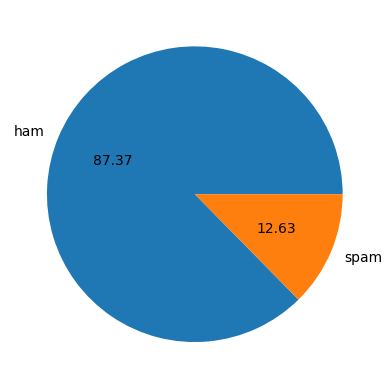

In [17]:
import matplotlib.pyplot as pie
pie.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
pie.show()

### *From above distribution we found that DAta is imbalanced*

***We will do analysis on the alphabets, woords and the sentences which are used in the Email, for that we have to import NLTK***

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rk991\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## *Number of Character used in each Email*

In [21]:
# Fetching the Characters in the each Email
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

## *Storing the number of characters of each Emain in a new Column*

In [22]:
df['num_characters'] = df['Text'].apply(len)

C:\Users\rk991\AppData\Local\Temp\ipykernel_18104\3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [23]:
df.head()

,Target,Text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## *Number of Words used in each Email*

In [24]:
# fetching the words in each Email
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

## *Storing the number of Words of each Emain in a new Column*

In [25]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\rk991\AppData\Local\Temp\ipykernel_18104\1774492338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df.head()

,Target,Text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


## *Number of Sentences used in each Email*

In [27]:
# fetching the Sentences in each Email
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

## *Storing the number of Sentences of each Emain in a new Column*

In [28]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\rk991\AppData\Local\Temp\ipykernel_18104\1884457437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## *Redescribing the data after adding the new columns*

In [30]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


## *Analysing the ham and spam mails separately*

In [31]:
df.replace({'Target' : {'ham' : 0, 'spam' : 1}} , inplace = True)

C:\Users\rk991\AppData\Local\Temp\ipykernel_18104\3480956759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Target' : {'ham' : 0, 'spam' : 1}} , inplace = True)


***Analysis the ham***

In [32]:
df[df['Target'] == 'ham'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


***Analysis the ham***

In [33]:
df[df['Target'] == 'spam'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


## *Ploting the histogram of ham and spam for Characters*

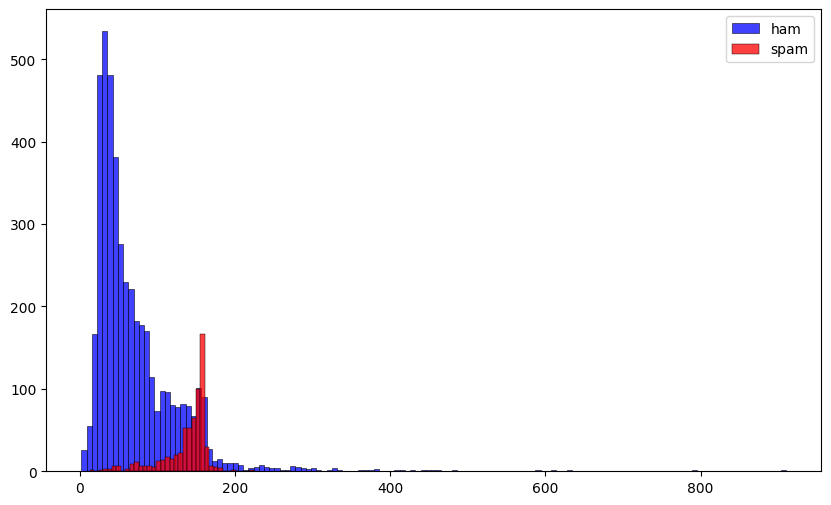

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['num_characters'], color='blue', label='ham')
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red', label='spam')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

## *Ploting the histogram of ham and spam for Words*

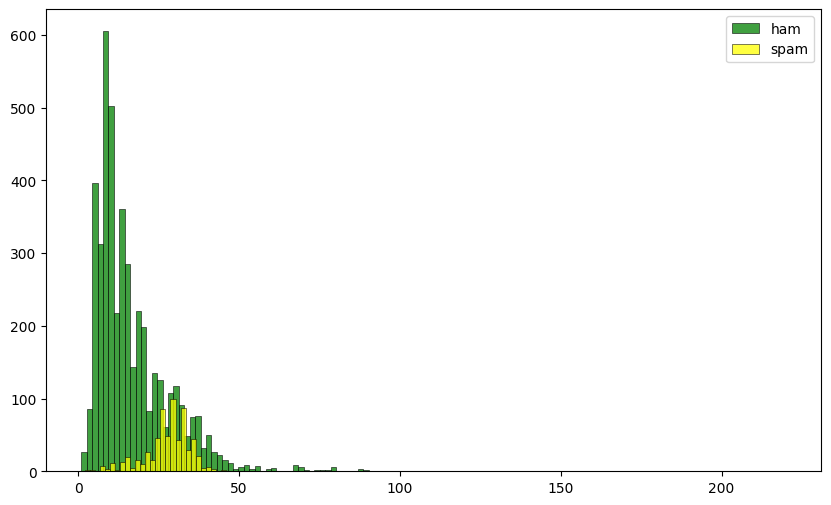

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['num_words'], color='green', label='ham')
sns.histplot(df[df['Target'] == 1]['num_words'], color='yellow', label='spam')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

## *Ploting the histogram of ham and spam for Sentences*

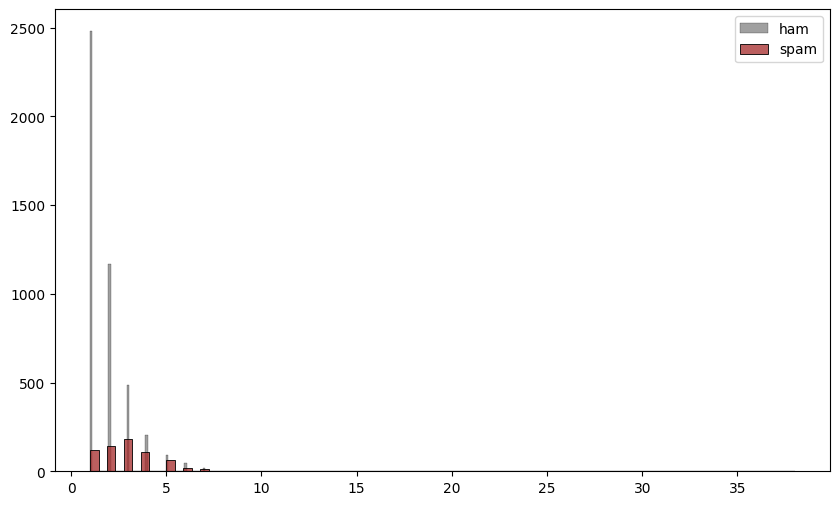

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Target'] == 0]['num_sentences'], color='gray', label='ham')
sns.histplot(df[df['Target'] == 1]['num_sentences'], color='brown', label='spam')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

C:\Users\rk991\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


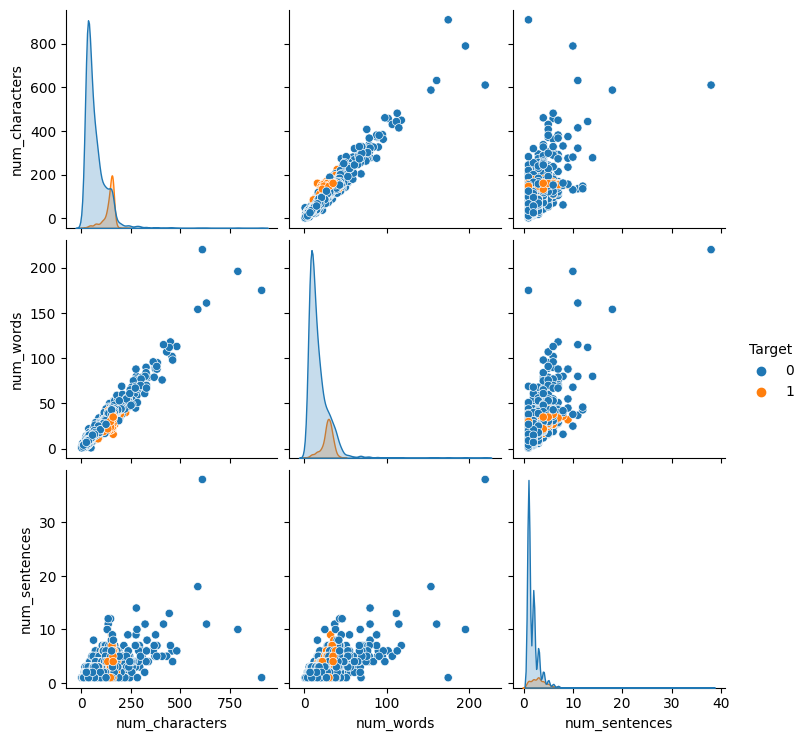

In [37]:
sns.pairplot(df, hue = 'Target')

## *Preprocessinng the Data*

***1) Transforming the data***

In [38]:
def transform_text1(text1):
    text1 = text1.lower()
    return text1

In [39]:
transform_text1("HELLO EVERYONE")

'hello everyone'

***2) Tokanize the data***

In [40]:
def transform_text2(text2):
    text2 = nltk.word_tokenize(text2)
    return text2

In [41]:
transform_text2("HELLO EVERYONE")

['HELLO', 'EVERYONE']

***3) Removing the special characters***

In [42]:
def transform_text3(text3):
    y = [i for i in text3 if i.isalnum()]
    return y

In [43]:
transform_text3("HELLO %# EVE^RYONE 50")

['H', 'E', 'L', 'L', 'O', 'E', 'V', 'E', 'R', 'Y', 'O', 'N', 'E', '5', '0']

In [44]:
def transform_text3a(text3a):
    text3a = text3a.lower()
    text3a = nltk.word_tokenize(text3a)
    y_a = []
    for i in text3a:
        if i.isalnum():
            y_a.append(i)
    return y_a

In [45]:
transform_text3a("HELLO %# EVERYONE 50")

['hello', 'everyone', '50']

***4) Removing the stop words and punctuation***

In [46]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rk991\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def transform_text4(text4):
    text4 = text4.lower()
    text4 = nltk.word_tokenize(text4)
    y_4 = []
    for i in text4:
        if i.isalnum():
            y_4.append(i)
    text4 = y_4[:]
    y_4.clear()
    for i in text4:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_4.append(i)
    return y_4

In [50]:
transform_text4('HELLO # 85@ Eve#*ruone')

['hello', '85', 'eve', 'ruone']

***5) Stemminng***

In [51]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
stemmed_word = porter_stemmer.stem('dancing')
print(stemmed_word)

danc


In [52]:
def transform_text5(text5):
    text5 = text5.lower()
    text5 = nltk.word_tokenize(text5)
    y_5 = []

    for i in text5:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y_5.append(porter_stemmer.stem(i))

    return " ".join(y_5)

In [53]:
transform_text5("I love the Machine Learning")

'love machin learn'

In [54]:
df['Text'][00]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [55]:
transform_text5(df['Text'][00])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## *Adding new column named "transformed_text" into the dataset*

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(porter_stemmer.stem(i))

    return " ".join(y)

In [57]:
df['transformed_text'] = df['Text'].apply(transform_text)

C:\Users\rk991\AppData\Local\Temp\ipykernel_18104\1893880433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


In [58]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
!pip install wordcloud

In [60]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width = 400, height = 400, min_font_size = 10, background_color = 'white')

In [61]:
df['Target'] == 1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5169, dtype: bool

In [62]:
df[df['Target'] == 1]

,Target,Text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [63]:
df[df['Target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [64]:
df[df['Target'] == 1]['transformed_text'].str.cat(sep = " ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [65]:
wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

In [66]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

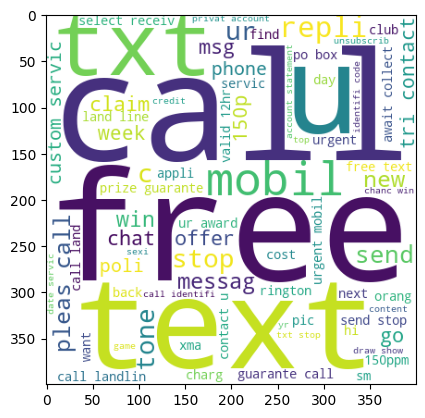

In [67]:
plt.imshow(spam_wc)

In [68]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))

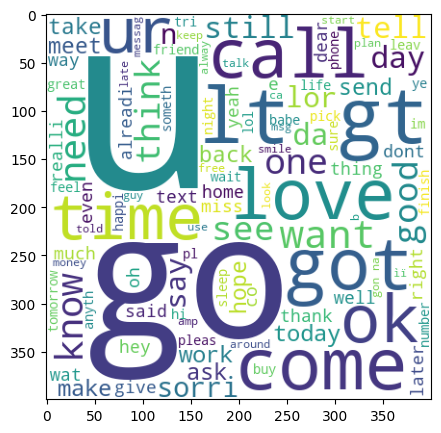

In [69]:
plt.figure(figsize = (5,5))
plt.imshow(ham_wc)

## *Top 50 words which is used on ham and spam*

In [70]:
df[df['Target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

***now split each word from the list***

In [71]:
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

***Created a spam_list and stored all the word in it***

In [72]:
spam_list = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_list.append(word)

In [73]:
spam_list

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [74]:
from collections import Counter
Counter(spam_list)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

***Now showing the most common 50 words of spam***

In [75]:
Counter(spam_list).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

## *Putting most common words in Dataframe for Spam*

In [76]:
pd.DataFrame(Counter(spam_list).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


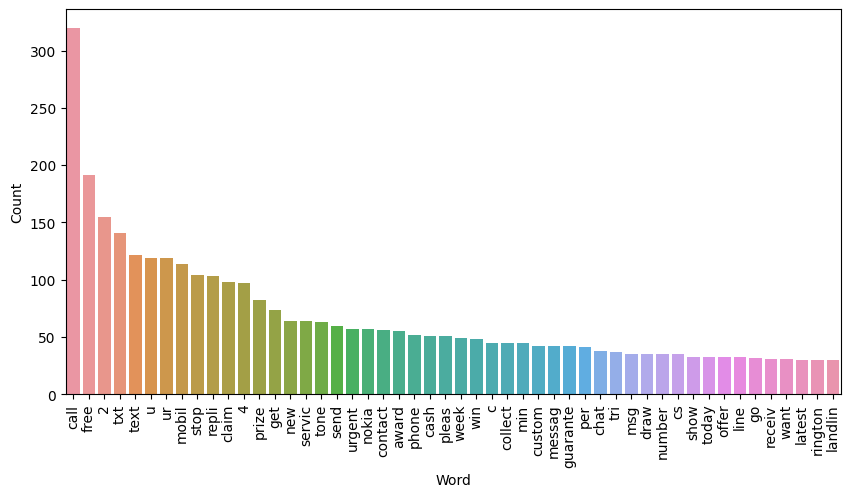

In [77]:
spam_list = spam_list 
counter_df = pd.DataFrame(Counter(spam_list).most_common(50), columns = ['Word', 'Count'])
plt.figure(figsize = (10,5))
sns.barplot(x ='Word', y = 'Count', data = counter_df)
plt.xticks(rotation ='vertical')
plt.show()

## *Now showing the most common 50 words for ham*

In [78]:
ham_list = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_list.append(word)

In [79]:
ham_list

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [80]:
Counter(ham_list).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

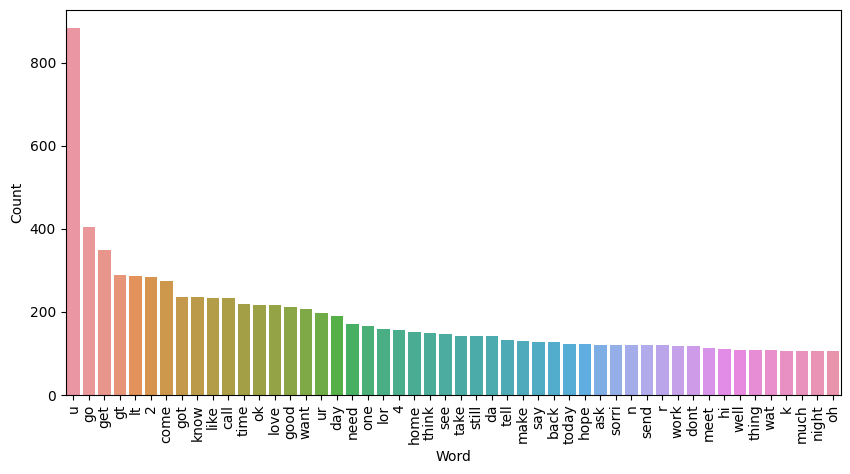

In [81]:
spam_list = ham_list
counter_df = pd.DataFrame(Counter(ham_list).most_common(50), columns=['Word', 'Count'])
plt.figure(figsize = (10,5))
sns.barplot(x = 'Word', y ='Count', data = counter_df)
plt.xticks(rotation = 'vertical')
plt.show()

## *Now Building the model*

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [83]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [84]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
x.shape

(5169, 6708)

In [86]:
y = df['Target'].values

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

## *Using Naive Bayes*

In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [91]:
gnb  = GaussianNB()

In [92]:
mnb = MultinomialNB()

In [93]:
bnb = BernoulliNB()

In [94]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [95]:
mnb.fit(x_train, y_train)
y_pred_gnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [96]:
bnb.fit(x_train, y_train)
y_pred_gnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [98]:
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
x_tfidf.shape

(5169, 6708)

In [101]:
y_tfidf = df['Target'].values

In [102]:
y_tfidf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [103]:
y_tfidf.shape

(5169,)

In [104]:
from sklearn.model_selection import train_test_split
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y_tfidf, test_size = 0.2, random_state = 2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb  = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [107]:
mnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = mnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [108]:
bnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = bnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
